In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
test = pd.read_csv('./sample_data/test.csv')
test = test.drop(['Name', 'Ticket', 'Cabin'], axis = 1)
# 이름, 티켓번호, 객실번호 제거

for i in range(len(test)):
    if(test.loc[i,'Sex'] == 'male'):
        test.loc[i,'Sex'] = 1  # 남성
    else:
        test.loc[i,'Sex'] = 0 # 여성
        
new_embark = pd.get_dummies(test['Embarked'],drop_first=True) # 승선 항구 범주형으로 변경
test.drop(['Embarked'],axis=1,inplace=True) # 데이터셋에서 항구 상제
test = pd.concat([test,new_embark],axis=1) # 데이터셋에 범주형으로 변경한 데이터 합치기

test['Fare'] = test['Fare'].fillna(test['Fare'].median()) # 티켓요금 데이터 결측치 중간값으로 대체
test['Age'] = test["Age"].fillna(test['Age'].median()) # 나이 데이터 결측치 중간값으로 대체
test2 = test
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,0,1
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,0,1
4,896,3,0,22.0,1,1,12.2875,0,1


In [ ]:
df = pd.read_csv("./sample_data/train.csv")

for i in range(len(df)):
    if(df.loc[i,'Sex'] == 'male'):
        df.loc[i,'Sex'] = 1;
    else:
        df.loc[i,'Sex'] = 0
        
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.describe() # 기술통계 생성 및 데이터 중심 경험 분산 평균 요약

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


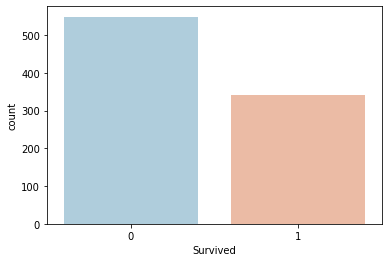

In [ ]:
print(df['Survived'].value_counts())  # 생존여부 1: 생존 , 0 :사망
sns.countplot(data = df, x = df['Survived'],palette='RdBu_r') 

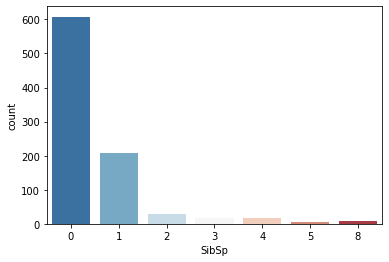

In [ ]:
sns.countplot(data = df, x = df['SibSp'], palette='RdBu_r') # 동반 가족수

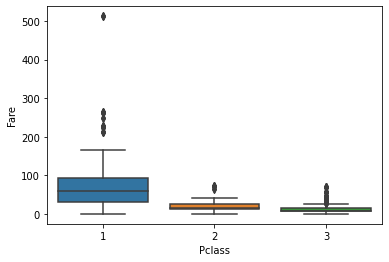

In [ ]:
sns.boxplot(x='Pclass',y='Fare',data=df)  # 승선등급별 티켓 값 

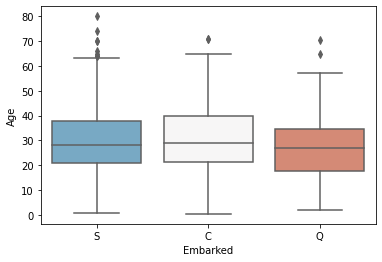

In [ ]:
sns.boxplot(x='Embarked',y='Age',data=df, palette='RdBu_r') # 승선 항구에 따른 탑승객 나이

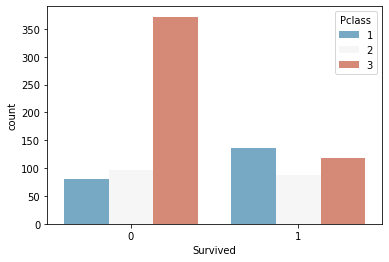

In [ ]:
sns.countplot(x='Survived',data=df,hue='Pclass', palette='RdBu_r') # 생존 여부에 따른 승선등급 (종속변수 Pclass로 지정)

In [128]:
df.isnull().sum() # 결측 데이터 확인

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [129]:
df['Age'] = df["Age"].fillna(df['Age'].median()) # 나이 데이터 결측치 중간값으로 대체
df[df['Embarked'].isnull()] # 승선 항구 없는 데이터 확인

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,0,38.0,0,0,80.0,NaN
829,830,1,1,0,62.0,0,0,80.0,NaN


In [130]:
df = df.drop([61,829], axis = 0)# 승선 항구 없는 데이터 제거

In [131]:
df.isnull().sum() # 결측치 없음 확인)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [132]:
df['Embarked'].value_counts() # 승선 항구별 카운트

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [133]:
new_embark = pd.get_dummies(df['Embarked'],drop_first=True)   # 승선 항구 범주형으로 변경
df.drop(['Embarked'],axis=1,inplace=True) # 데이터셋에서 항구 상제
df = pd.concat([df,new_embark],axis=1) # 데이터셋에 범주형으로 변경한 데이터 합치기
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,1,0,3,1,22.0,1,0,7.2500,0,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,1
5,6,0,3,1,28.0,0,0,8.4583,1,0
6,7,0,1,1,54.0,0,0,51.8625,0,1
7,8,0,3,1,2.0,3,1,21.0750,0,1
8,9,1,3,0,27.0,0,2,11.1333,0,1
9,10,1,2,0,14.0,1,0,30.0708,0,0


In [135]:
from sklearn.model_selection import train_test_split # kfold 
X = df.drop('Survived', axis = 1) # 원본데이터
y = df['Survived']  # 원본 레이블
# test_size=0.3 평가 셋의 비률 지정
# random_state=101 랜덤 시드를 정해주는 매개변수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# train_test_split 함수 훈련데이터와 합습 데이터를 분리해주는 함수
# 반환값 -> X_train 훈련 데이터,  X_test 평가 데이터,  y_train 훈련레이블,  y_test 평가 레이블

In [139]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()  # 전처리
scaler.fit(X_train)
X_train = scaler.transform(X_train) # 훈련데이터 차원축소(pca)
X_test = scaler.transform(X_test)  # 평가 데이터 차원축소(pca)
#test = scaler.transform(test) # test.csv 데이터 차원축소(pca)

In [157]:
from sklearn.linear_model import LogisticRegression 

log_model = LogisticRegression()
log_model.fit(X_train,y_train)  # 훈련데이터 fit

# 모델이 데이터로 예측한 값이 실제 레이블과 얼마나 일치하는지를 확인
print(" 훈련셋 정확도 : " , log_model.score(X_train, y_train))
print(" 평가셋 정확도 : " , log_model.score(X_test, y_test))

y_pred = log_model.predict(X_test) # 평가데이터로 예측


 훈련셋 정확도 :  0.7958199356913184
 평가셋 정확도 :  0.8239700374531835


In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
accuracy_score(y_test, y_pred)  # 예측 결과 정확도

0.8239700374531835

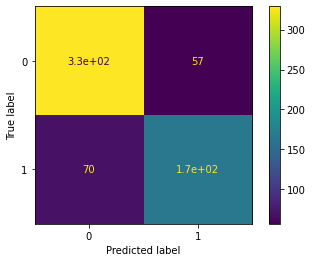

In [144]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model, X_train, y_train)  

In [ ]:
print(classification_report(y_test, y_pred))  # 모델 평가지표 y_test : 실제값  y_pred 예측값

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267

